In [164]:
# The essence of machine learning and deep learning is to take some data from the past,
# build an algorithm (like a neural network) to discover patterns in it and use the discoverd patterns to predict the future.

topic_in_this_notebook = {
    1: 'Data (prepare and load)',
    2: 'Build model',
    3: 'fitting the model to data (Training)',
    4: 'making a prediction and evalutating a model (inference)',
    5: 'saving and loading a model',
    6: 'put it all together',
}

topic_in_this_notebook


{1: 'Data (prepare and load)',
 2: 'Build model',
 3: 'fitting the model to data (Training)',
 4: 'making a prediction and evalutating a model (inference)',
 5: 'saving and loading a model',
 6: 'put it all together'}

In [165]:
# Dependicies
import torch
from torch import nn #nn contains all pytorch's building blocks for neutral networks
import matplotlib.pyplot as plt

#check version
torch.__version__


'2.4.1+cu121'

# Data (Preparing and loading)

Machine learning is a game of two parts:

* Turn your data, whatever it is, into numbers (a representation).
* Pick or build a model to learn the representation as best as possible.

Data can be anything...
* Excel, image, audio, video(yt), DNA, Text etc..

We'll use linear regression to create the data with known parameters (things that can be learned by a model) and then we'll use PyTorch to see if we can build model to estimate these parameters using gradient descent.

In [166]:
#Create *Known* parameters
weight = 0.7
bias = 0.3

#create a dataset
start = 0
stop = 1
step = 0.02
X = torch.arange(start, stop, step).unsqueeze(dim=1)

#Linear reg formula y = mx + c
Y = weight*X + bias
print(X, Y)
print(f"Total dataset: X -> {len(X)} set, Y -> {len(Y)}")

tensor([[0.0000],
        [0.0200],
        [0.0400],
        [0.0600],
        [0.0800],
        [0.1000],
        [0.1200],
        [0.1400],
        [0.1600],
        [0.1800],
        [0.2000],
        [0.2200],
        [0.2400],
        [0.2600],
        [0.2800],
        [0.3000],
        [0.3200],
        [0.3400],
        [0.3600],
        [0.3800],
        [0.4000],
        [0.4200],
        [0.4400],
        [0.4600],
        [0.4800],
        [0.5000],
        [0.5200],
        [0.5400],
        [0.5600],
        [0.5800],
        [0.6000],
        [0.6200],
        [0.6400],
        [0.6600],
        [0.6800],
        [0.7000],
        [0.7200],
        [0.7400],
        [0.7600],
        [0.7800],
        [0.8000],
        [0.8200],
        [0.8400],
        [0.8600],
        [0.8800],
        [0.9000],
        [0.9200],
        [0.9400],
        [0.9600],
        [0.9800]]) tensor([[0.3000],
        [0.3140],
        [0.3280],
        [0.3420],
        [0.3560],
        [

#Split data into training and test sets

3 dataset technique to train model
 * Training set: 60-80% data
 * Validation set: 10-20% data(optional)
 * Testing set: 10-20% data

``Generalization: Train model to perform well on data, it hasn't seen before.``

In [167]:
#Create a train and test set data on above dataset...
train_split = int(len(X) * 0.8)
X_train, Y_train = X[:train_split], Y[:train_split]
X_test, Y_test = X[train_split:], Y[train_split:]
X_test

tensor([[0.8000],
        [0.8200],
        [0.8400],
        [0.8600],
        [0.8800],
        [0.9000],
        [0.9200],
        [0.9400],
        [0.9600],
        [0.9800]])

#Visualizing using matplotlib

In [168]:
def plot_prediction(train_data=X_train,
                    train_labels=Y_train,
                    test_data=X_test,
                    test_labels=Y_test,
                    prediction=None):
  #Plot training data and compare predictions
  plt.figure(figsize=(12,7))

  #Plot training data in blue
  plt.scatter(train_data, train_labels, c='b',s=6, label="Training data")

  #Plot training data in green
  plt.scatter(test_data, test_labels, c='g',s=6, label="Testing data")

  # Are there prediction?
  if prediction is not None:
    #Plot prediction if exist
    plt.scatter(test_data, prediction, c='r', label='Predicted data')

  #show the legend
  plt.legend(prop={'size': 14});




The model we create is going to try and learn the relationship between X_train & y_train and then we will evaluate what it learns on X_test and y_test.


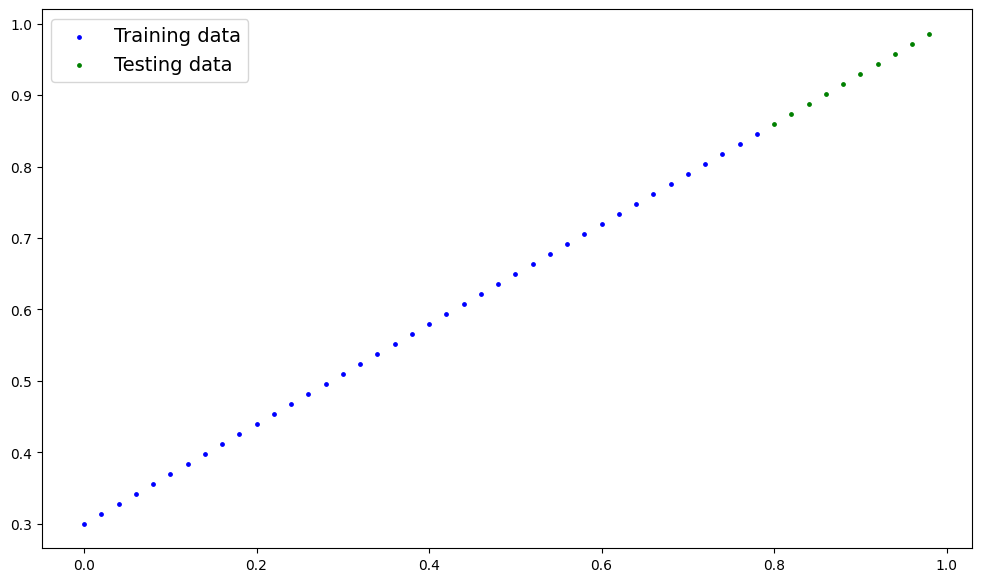

In [169]:
plot_prediction()

#Creating Pytorch model for linear regression

What our model does?
* Start with random value (weights and bias)
* Look at training data and adjust the random value to be better represent (or get closer to) ideal values(the weight and bias values we used to create the data)

Two main algorithms:
* Gradient descent
* Backpropogation

In [170]:
# 2. Build Model

#Create linear regression model class
#Model is created using oops in python

class LinearRegressionModel(nn.Module): # <- almost everything in PyTorch is a nn.Module (think of this as neural network lego blocks)
  def __init__(self):
    super().__init__()
    self.weights = nn.Parameter(torch.randn(1, # <- start with random weights (this will get adjusted as the model learns)
                                           requires_grad=True, # <- Tthis parameter track by gradient..
                                           dtype=torch.float))
    self.bias = nn.Parameter(torch.randn(1,
                                           requires_grad=True,
                                           dtype=torch.float))

  #Forward method to define computational in Model:
  def forward(self, x: torch.tensor) -> torch.Tensor: # <- "x" is the input data (e.g. training/testing features)
    return self.weights * x + self.bias



# Pytorch model building essentials

* torch.nn	- Contains all of the building blocks for computational graphs (essentially a series of computations executed in a particular way).
* torch.nn.Parameter - Stores tensors that can be used with nn.Module. If requires_grad=True gradients (used for updating model parameters via gradient descent) are calculated automatically, this is often referred to as "autograd".
* torch.nn.Module - The base class for all neural network modules, all the building blocks for neural networks are subclasses. If you're building a neural network in PyTorch, your models should subclass nn.Module. Requires a forward() method be implemented.
* torch.optim - Contains various optimization algorithms(these tell the model parameters stored in nn.Parameter how to best change to improve gradient descent and in turn reduce the loss).
* def forward()- All nn.Module subclasses require a forward() method, this defines the computation that will take place on the data passed to the particular nn.Module (e.g. the linear regression formula above).

# Checking the contents in Pytorch model

In [171]:
#Create a random seed..
torch.manual_seed(42)

#Create a instance of the model
model_0 = LinearRegressionModel()
model_0

#check out the parameters
print(list(model_0.parameters()), '\n')

#Named Parameters
print(model_0.state_dict())

[Parameter containing:
tensor([0.3367], requires_grad=True), Parameter containing:
tensor([0.1288], requires_grad=True)] 

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])


In [172]:
# When you call model_0.parameters(), it will return an iterator over these two parameters: the weight and the bias.
# the parameters() method is inherited from the nn.Module class
# nearly all custom models are subclasses of torch.nn.Module, which provides various utilities like parameters() and forward() methods.

# How parameters() Works:
# When you define layers or parameters using torch.nn.Parameter or torch.nn.Module components in your model,
#  nn.Module registers them as part of the model. Then, parameters() automatically collects these parameters.

# Making Prediction with our random model using torch.inference_model()

To check this we can pass it the test data X_test to see how closely it predicts y_test.

When we pass data to our model, it'll go through the model's forward() method and produce a result using the computation we've defined.




In [173]:
X_test, Y_test

(tensor([[0.8000],
         [0.8200],
         [0.8400],
         [0.8600],
         [0.8800],
         [0.9000],
         [0.9200],
         [0.9400],
         [0.9600],
         [0.9800]]),
 tensor([[0.8600],
         [0.8740],
         [0.8880],
         [0.9020],
         [0.9160],
         [0.9300],
         [0.9440],
         [0.9580],
         [0.9720],
         [0.9860]]))

You probably noticed we used torch.inference_mode() as a context manager (that's what the with torch.inference_mode(): is) to make the predictions.

As the name suggests, torch.inference_mode() is used when using a model for inference (making predictions).

torch.inference_mode() turns off a bunch of things (like gradient tracking, which is necessary for training but not for inference) to make forward-passes (data going through the forward() method) faster.

**Note:** In older PyTorch code, you may also see torch.no_grad() being used for inference. While torch.inference_mode() and torch.no_grad() do similar things, torch.inference_mode() is newer, potentially faster and preferred. See this Tweet from PyTorch for more.



In [174]:
#Make Prediction on model
with torch.inference_mode():
  y_preds = model_0(X_test)
# or
with torch.no_grad():
  y_preds_grad = model_0(X_test)

print(y_preds, '\n', y_preds_grad)

tensor([[0.3982],
        [0.4049],
        [0.4116],
        [0.4184],
        [0.4251],
        [0.4318],
        [0.4386],
        [0.4453],
        [0.4520],
        [0.4588]]) 
 tensor([[0.3982],
        [0.4049],
        [0.4116],
        [0.4184],
        [0.4251],
        [0.4318],
        [0.4386],
        [0.4453],
        [0.4520],
        [0.4588]])


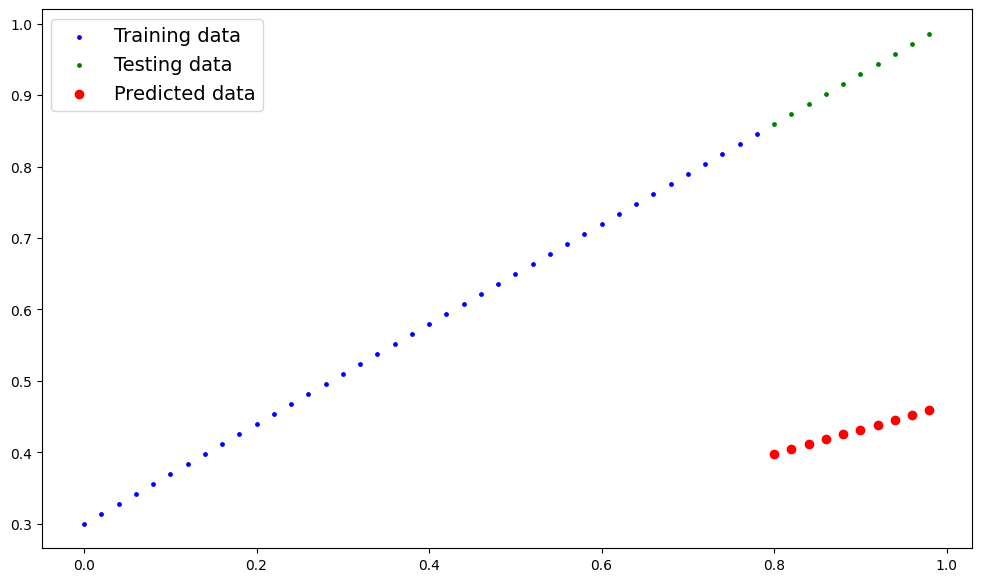

In [175]:
plot_prediction(prediction = y_preds)

# Train the model
* The whole idea is to trainning a model from unknown paramters to known parameters
* One way to measure how predictions of our model is wrong, is by checking loss function.(cost function)

Things we need to train:
*  **Loss function:** Measures how wrong your model predictions are to ideal output
* **Optimizer**: Take into account of model's loss and adjust the model parameters(Weight and Loss) to improve the loss function..

And specifically, for Pytorch, we need:
* Training Loop
* Testing Loop


In [176]:
#Setup a loss function.
loss_fn = nn.L1Loss()
loss_fn

#Setup Optimizer (Stochastic gradient descent)
optimizer = torch.optim.SGD(params=model_0.parameters(),
                            lr=0.01) #Learning Rate = possibly the most important hyperparameter you can set...

optimizer

SGD (
Parameter Group 0
    dampening: 0
    differentiable: False
    foreach: None
    fused: None
    lr: 0.01
    maximize: False
    momentum: 0
    nesterov: False
    weight_decay: 0
)

In [177]:
print(list(model_0.parameters()), '\n\n',  model_0.state_dict())

[Parameter containing:
tensor([0.3367], requires_grad=True), Parameter containing:
tensor([0.1288], requires_grad=True)] 

 OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])


# Building a Training Loop & (Testing Loop) in Pytorch..

A Couple of things we need to do.
* 0.Loop through the data and do...
*1.Forward pass - The model goes through all of the training data once, performing its forward() function calculations.
* 2.Calculate the loss - The model's outputs (predictions) are compared to the ground truth and evaluated to see how wrong they are.
* 3.Zero gradients - The optimizers gradients are set to zero (they are accumulated by default) so they can be recalculated for the specific training step.
* 4.Perform backpropagation on the loss - Computes the gradient of the loss with respect for every model parameter to be updated (each parameter with requires_grad=True). This is known as backpropagation, hence "backwards".
* 5.Update the optimizer (gradient descent) - Update the parameters with requires_grad=True with respect to the loss gradients in order to improve them.

In [178]:
torch.manual_seed(42)
# An epoch is one loop through the data.

# Create empty loss lists to track values
train_loss_values = []
test_loss_values = []
epoch_count = []

epochs = 100
for epoch in range(epochs):

   model_0.train()  # Training mode sets all the parameters that require gradients to require gradients

   # Forward pass
   y_pred = model_0(X_train)

   # Calculate the loss
   loss = loss_fn(y_pred, Y_train)
  #  print(f'Loss: {loss}')

   # optimizer.zero_grad() should have parentheses
   optimizer.zero_grad()

   # Perform backpropagation on the loss with respect to parameters of the model
   loss.backward()

   # Step the optimizer
   optimizer.step()

   ### Testing

   # Put the model in evaluation mode
   model_0.eval() #Turns off the different setting in the model not needed for evaluating or testing (dropout/batch norm layers)
   with torch.inference_mode(): #Turns off the gradient tracking and couple of more things behind the scenes...
      #Do the forward pass:
      test_pred_y = model_0(X_test)

      test_loss = loss_fn(test_pred_y, Y_test)

   # Print out what's happening
   if epoch % 10 == 0:
      epoch_count.append(epoch)
      train_loss_values.append(loss.detach().numpy())
      test_loss_values.append(test_loss.detach().numpy())
      print(f"Epoch: {epoch} | MAE Train Loss: {loss} | MAE Test Loss: {test_loss} ")


Epoch: 0 | MAE Train Loss: 0.31288138031959534 | MAE Test Loss: 0.48106518387794495 
Epoch: 10 | MAE Train Loss: 0.1976713240146637 | MAE Test Loss: 0.3463551998138428 
Epoch: 20 | MAE Train Loss: 0.08908725529909134 | MAE Test Loss: 0.21729660034179688 
Epoch: 30 | MAE Train Loss: 0.053148526698350906 | MAE Test Loss: 0.14464017748832703 
Epoch: 40 | MAE Train Loss: 0.04543796554207802 | MAE Test Loss: 0.11360953003168106 
Epoch: 50 | MAE Train Loss: 0.04167863354086876 | MAE Test Loss: 0.09919948130846024 
Epoch: 60 | MAE Train Loss: 0.03818932920694351 | MAE Test Loss: 0.08886633068323135 
Epoch: 70 | MAE Train Loss: 0.03476089984178543 | MAE Test Loss: 0.0805937647819519 
Epoch: 80 | MAE Train Loss: 0.03132382780313492 | MAE Test Loss: 0.07232122868299484 
Epoch: 90 | MAE Train Loss: 0.02788739837706089 | MAE Test Loss: 0.06473556160926819 


In [179]:
epoch_count, train_loss_values

([0, 10, 20, 30, 40, 50, 60, 70, 80, 90],
 [array(0.31288138, dtype=float32),
  array(0.19767132, dtype=float32),
  array(0.08908726, dtype=float32),
  array(0.05314853, dtype=float32),
  array(0.04543797, dtype=float32),
  array(0.04167863, dtype=float32),
  array(0.03818933, dtype=float32),
  array(0.0347609, dtype=float32),
  array(0.03132383, dtype=float32),
  array(0.0278874, dtype=float32)])

In [180]:

print(model_0.state_dict())


OrderedDict([('weights', tensor([0.5784])), ('bias', tensor([0.3513]))])


In [181]:
with torch.inference_mode():
  y_pred_new = model_0(X_test)
y_pred_new

print(y_pred_new, Y_test)

tensor([[0.8141],
        [0.8256],
        [0.8372],
        [0.8488],
        [0.8603],
        [0.8719],
        [0.8835],
        [0.8950],
        [0.9066],
        [0.9182]]) tensor([[0.8600],
        [0.8740],
        [0.8880],
        [0.9020],
        [0.9160],
        [0.9300],
        [0.9440],
        [0.9580],
        [0.9720],
        [0.9860]])


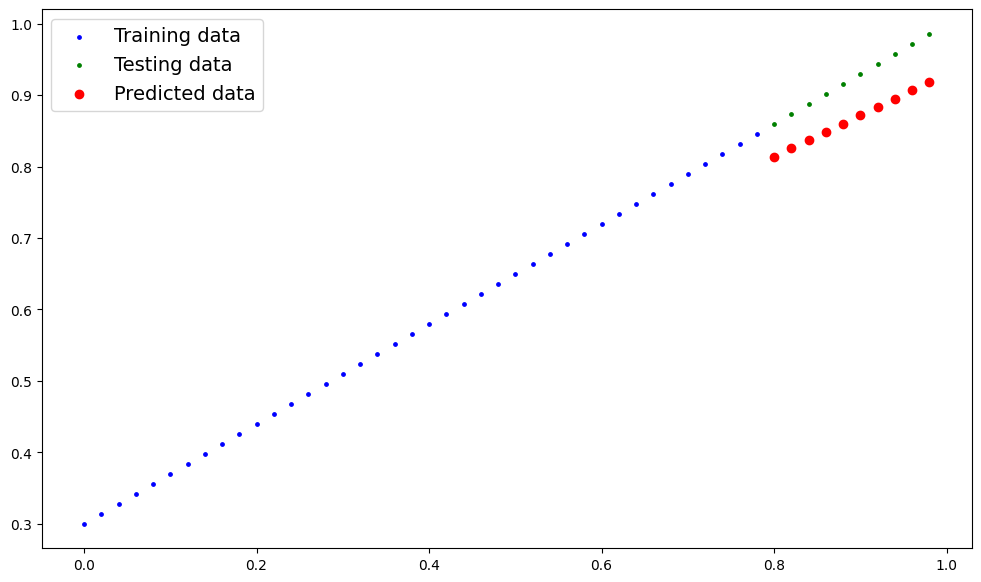

In [182]:
plot_prediction(prediction = y_pred_new)

In [183]:
# Epoch: One complete pass through the entire training dataset.
# Epochs represent how many times the entire dataset is passed through the model.
# gradient represents the partial derivative of a function (e.g., a loss function) with respect to its parameters (weights and biases in a model).
# An optimizer is an algorithm that adjusts the parameters of the model (e.g., weights and biases) based on the gradients computed during backpropagation.

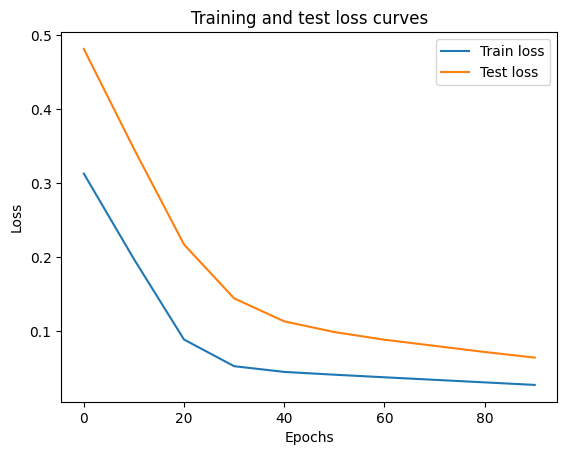

In [184]:
# Plot the loss curves
plt.plot(epoch_count, train_loss_values, label="Train loss")
plt.plot(epoch_count, test_loss_values, label="Test loss")
plt.title("Training and test loss curves")
plt.ylabel("Loss")
plt.xlabel("Epochs")
plt.legend();

# Saving and loading a PyTorch model

For saving and loading models in PyTorch, there are three main methods:
* **torch.save** - Saves a serialized object to disk using Python's pickle utility. Models, tensors and various other Python objects like dictionaries can be saved using torch.save
* **torch.load** - Uses pickle's unpickling features to deserialize and load pickled Python object files (like models, tensors or dictionaries) into memory. You can also set which device to load the object to (CPU, GPU etc).
* **torch.nn.Module.load_state_dict** - Loads a model's parameter dictionary (model.state_dict()) using a saved state_dict() object.

In [185]:
# Saving our pytorch model
from pathlib import Path

#  1. Create Models directory
MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents = True, exist_ok = True)


# 2. Create Model save path
MODEL_NAME = "01_pytorch_workflow.pth"
MODEL_SAVE_PATH = MODEL_PATH/MODEL_NAME

# 3. Save the model state dict
print(MODEL_SAVE_PATH)
torch.save(obj=model_0.state_dict(),  # only saving the state_dict() only saves the models learned parameters
           f = MODEL_SAVE_PATH)



models/01_pytorch_workflow.pth


In [186]:
!ls -l models

total 8
-rw-r--r-- 1 root root 1568 Sep 21 03:48 01_pytorch_workflow.pth
-rw-r--r-- 1 root root 1560 Sep 21 03:47 model_1.pth


In [187]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.5784])), ('bias', tensor([0.3513]))])


Loading a saved PyTorch model's state_dict()
Since we've now got a saved model state_dict() at models/01_pytorch_workflow_model_0.pth we can now load it in using torch.nn.Module.load_state_dict(torch.load(f)) where f is the filepath of our saved model state_dict().


Because we only saved the model's state_dict() which is a dictionary of learned parameters and not the entire model, we first have to load the state_dict() with torch.load() and then pass that state_dict() to a new instance of our model (which is a subclass of nn.Module).

In [188]:
# Model Load

loaded_model_0 = LinearRegressionModel()
# print(loaded_model_0.state_dict())

# Load the state_dict of our saved model (this will update the new instance of our model with trained weights)
loaded_model_0.load_state_dict(torch.load(f=MODEL_SAVE_PATH, weights_only=True))
loaded_model_0.state_dict()

OrderedDict([('weights', tensor([0.5784])), ('bias', tensor([0.3513]))])

In [189]:
# 1. Put the loaded model into evaluation mode
loaded_model_0.eval()
# 2. Use the inference mode context manager to make predictions
with torch.inference_mode():
  loaded_model_preds = loaded_model_0(X_test)  # perform a forward pass on the test data with the loaded model

# Compare previous model predictions with loaded model predictions (these should be the same)
y_pred_new == loaded_model_preds

tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]])

It looks like the loaded model predictions are the same as the previous model predictions (predictions made prior to saving). This indicates our model is saving and loading as expected.

# Combining and practice all the above step:

In [190]:
# Combing all of these above steps
import torch
from torch import nn
import matplotlib.pyplot as plt

#Setup device agnostic code:
device = "cuda" if torch.cuda.is_available() else "cpu"

weight = 0.7
bias = 0.3

#create a dataset
X = torch.arange(0, 1, 0.02).unsqueeze(dim=1)
Y = weight * X + bias

#Splitting the data
eight_per = int(len(X) * 0.8)
X_train = X[:eight_per]
Y_train = Y[:eight_per]
X_test = X[eight_per:]
Y_test = Y[eight_per:]

len(X_test), len(Y_test), len(Y), eight_per

(10, 10, 50, 40)

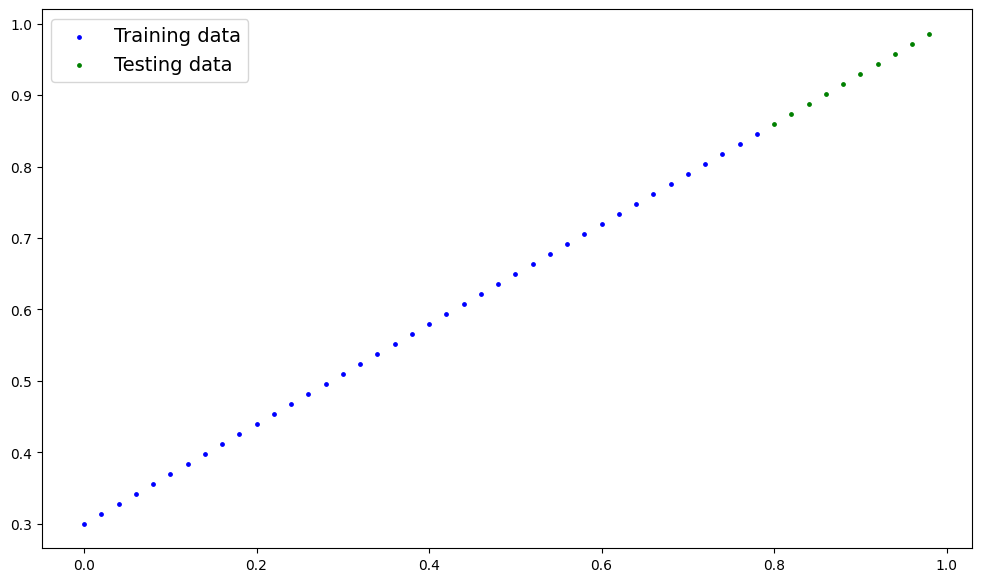

In [191]:
# Plot the data
plot_prediction(X_train, Y_train, X_test, Y_test)

In [192]:
#Create a model
class LinearRegressionModelV2(nn.Module):
    def __init__(self):
        super().__init__()
        # Define the linear layer
        # nn.linear set as default itself as linear regression formula/ also use nn.Linear() for creating model parameters
        self.linear_layer = nn.Linear(in_features=1, out_features=1)

    def forward(self, x: torch.Tensor) -> torch.Tensor:
        # Apply the linear transformation
        return self.linear_layer(x)

In [193]:
#Create a model

# create a random seed
torch.manual_seed(42)

model_1 = LinearRegressionModelV2()
model_1.state_dict()

#Making a prediction with random paramter
model_1.eval()

with torch.inference_mode():
  Y_pred_1 = model_1(X_test)

Y_pred_1

tensor([[1.4416],
        [1.4569],
        [1.4722],
        [1.4875],
        [1.5028],
        [1.5181],
        [1.5334],
        [1.5487],
        [1.5640],
        [1.5793]])

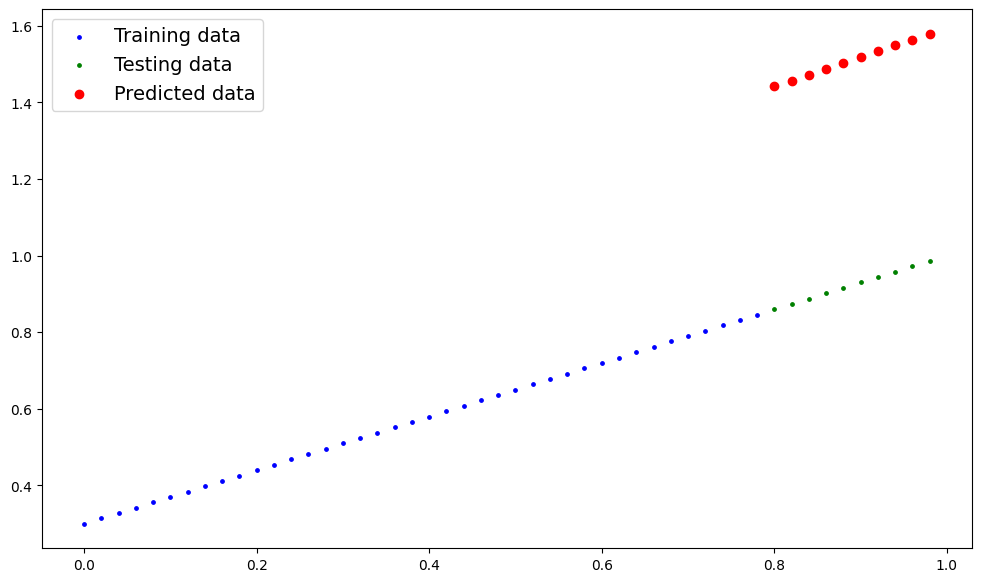

In [194]:
plot_prediction(X_train, Y_train, X_test, Y_test, prediction = Y_pred_1)

In [195]:
# Check the model parameters in current device
next(model_1.parameters()).device

# Transfer to target device
model_1.to(device)
next(model_1.parameters()).device

device(type='cpu')

In [196]:
#Training a Model

#setup loss function
loss_fn1 = nn.L1Loss()

#setup optimizer
optimizer1 = torch.optim.SGD(params=model_1.parameters(),
                            lr=0.01) #Learning Rate = possibly the most important hyperparameter you can set...

X_train = X_train.to(device)
Y_train = Y_train.to(device)
X_test = X_test.to(device)
Y_test = Y_test.to(device)


#Let's train a model
epochs = 200
for epoch in range(epochs):

  #Set training mode
  model_1.train()

  Y_pred_new1 = model_1(X_train)

  loss = loss_fn1(Y_pred_new1, Y_train)

  optimizer1.zero_grad()

  loss.backward()

  optimizer1.step()

  #Testing
  model_1.eval()
  with torch.inference_mode():

    Y_pred_test1 = model_1(X_test)
    test_loss = loss_fn1(Y_pred_test1, Y_test)

  if epoch % 10 == 0:
    print(f'epoch: {epoch} | loss: {loss} | test_loss: {test_loss}')

epoch: 0 | loss: 0.5551779866218567 | test_loss: 0.5739762187004089
epoch: 10 | loss: 0.4399680495262146 | test_loss: 0.4392663538455963
epoch: 20 | loss: 0.3247582018375397 | test_loss: 0.30455657839775085
epoch: 30 | loss: 0.20954827964305878 | test_loss: 0.16984674334526062
epoch: 40 | loss: 0.09433844685554504 | test_loss: 0.03513689711689949
epoch: 50 | loss: 0.023886386305093765 | test_loss: 0.04784906655550003
epoch: 60 | loss: 0.0199567973613739 | test_loss: 0.04580312222242355
epoch: 70 | loss: 0.016517987474799156 | test_loss: 0.0375305712223053
epoch: 80 | loss: 0.013089170679450035 | test_loss: 0.029944902285933495
epoch: 90 | loss: 0.009653178043663502 | test_loss: 0.02167237363755703
epoch: 100 | loss: 0.006215679459273815 | test_loss: 0.014086711220443249
epoch: 110 | loss: 0.002787243574857712 | test_loss: 0.005814164876937866
epoch: 120 | loss: 0.0012645035749301314 | test_loss: 0.013801807537674904
epoch: 130 | loss: 0.0012645035749301314 | test_loss: 0.01380180753767

In [197]:
# Testing
model_1.eval()
with torch.inference_mode():
  pred_1 = model_1(X_test)


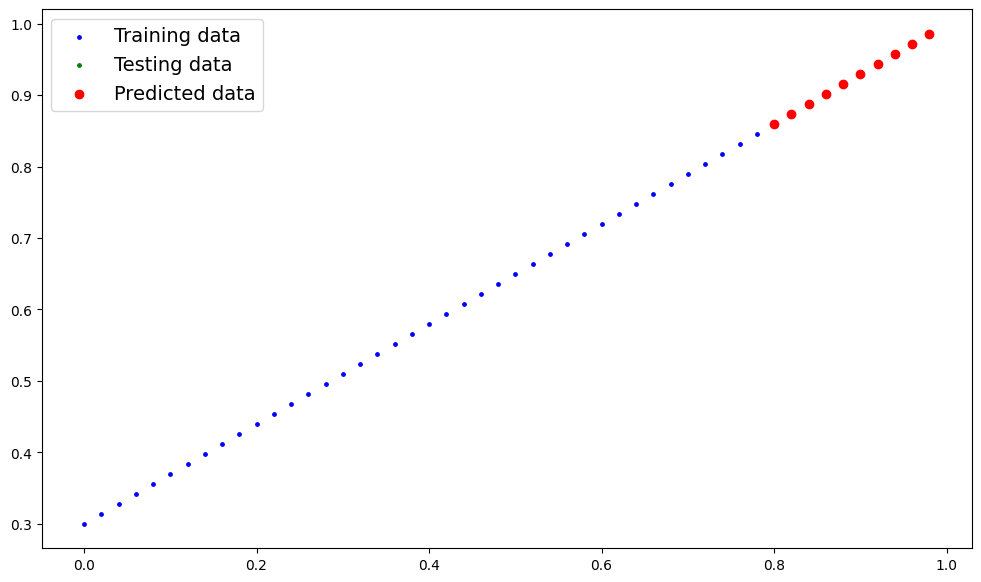

In [198]:
plot_prediction(X_train, Y_train, X_test, Y_test, prediction = pred_1)

In [199]:
# Save and Load Model
from pathlib import Path

#create a model path
MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents = True, exist_ok = True)

#create a model save path
MODEL_NAME = 'model_1.pth'
MODEL_SAVE_PATH = MODEL_PATH/MODEL_NAME

#save the model
torch.save(obj = model_1.state_dict(),
           f = MODEL_SAVE_PATH)


In [203]:
# Load the save model and use it
loaded_model_1 = LinearRegressionModelV2()
loaded_model_1.load_state_dict(torch.load(MODEL_SAVE_PATH))

# to change the target device of model parameter
next(loaded_model_1.parameters()).device

loaded_model_1.state_dict()

<ipython-input-203-f6fbf470a780>:3: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  loaded_model_1.load_state_dict(torch.load(MODEL_SAVE_PATH))


OrderedDict([('linear_layer.weight', tensor([[0.6968]])),
             ('linear_layer.bias', tensor([0.3025]))])

In [204]:
# Evaluate the loaded model
loaded_model_1.eval()
with torch.inference_mode():
  loaded_pred_1 = loaded_model_1(X_test)

loaded_pred_1 == Y_pred_test1

tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]])